In [1]:
!pip install ultralytics
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import Image, display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 697.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 6.0 MB/s eta 0:00:00


# **Visualizing and Loading the data**

In [2]:
root_dir = '/kaggle/input/aquarium-data-cots/aquarium_pretrain'

In [3]:
train_img_dir = '/kaggle/input/aquarium-data-cots/aquarium_pretrain/train/images/IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52bb325a0c.jpg'
test_img_dir = '/kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg'

In [4]:
train_img = cv2.imread(os.path.join(train_img_dir))
test_img = cv2.imread(os.path.join(test_img_dir))

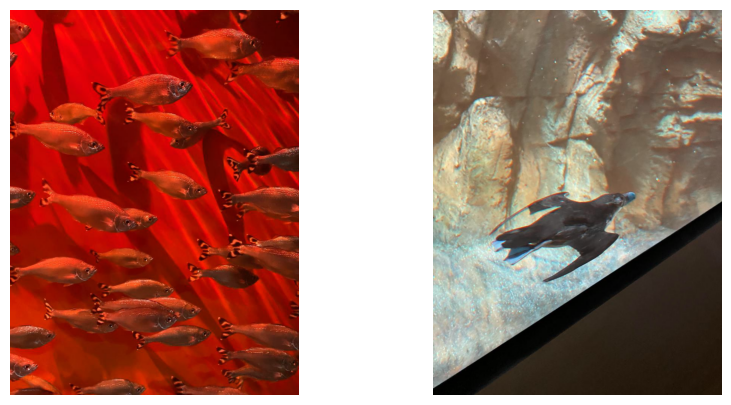

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.imshow(train_img)
plt.axis('off')
plt.subplot(1, 2, 2)  
plt.imshow(test_img)
plt.axis('off')

plt.show()

# **Training The Model**

In [6]:
!wandb disabled

W&B disabled.


In [7]:
model = YOLO('yolov8n.yaml')

results = model.train(data = os.path.join(root_dir, 'data.yaml'), epochs = 100)

Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/aquarium-data-cots/aquarium_pretrain/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]
2024-05-17 10:47:08,725	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-17 10:47:10,451	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/aquarium-data-cots/aquarium_pretrain/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:01<00:00, 308.96it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/aquarium-data-cots/aquarium_pretrain/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/aquarium-data-cots/aquarium_pretrain/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 297.88it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/aquarium-data-cots/aquarium_pretrain/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.47G       4.21      4.868      4.243        174        640: 100%|██████████| 28/28 [00:12<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        127        909    0.00022     0.0215   0.000156   4.43e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.59G      4.103      4.706      4.145        176        640: 100%|██████████| 28/28 [00:06<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        127        909   0.000261     0.0218    0.00018   4.98e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.68G      3.817      4.466      3.949        196        640: 100%|██████████| 28/28 [00:06<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        127        909   0.000418     0.0457   0.000238    8.3e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.51G      3.697      4.293      3.698        215        640: 100%|██████████| 28/28 [00:06<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]

                   all        127        909   0.000517     0.0343   0.000802    0.00028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.51G      3.561      4.119      3.468        182        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        127        909    0.00271      0.079     0.0053    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.49G      3.418      4.094      3.327        226        640: 100%|██████████| 28/28 [00:06<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        127        909      0.605     0.0185    0.00879    0.00269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.54G      3.323      3.917      3.148        330        640: 100%|██████████| 28/28 [00:06<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        127        909      0.155     0.0448    0.00671    0.00216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.62G      3.185       3.79      3.023        241        640: 100%|██████████| 28/28 [00:06<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        127        909      0.609     0.0592     0.0249    0.00717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.45G      3.122      3.716      2.957        131        640: 100%|██████████| 28/28 [00:06<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        127        909      0.772     0.0274     0.0281    0.00814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.32G      3.066      3.601      2.828        187        640: 100%|██████████| 28/28 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        127        909      0.646      0.029     0.0335     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.62G      3.005      3.529       2.77        203        640: 100%|██████████| 28/28 [00:06<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        127        909      0.463      0.039     0.0211     0.0061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.39G      2.912      3.428      2.694        141        640: 100%|██████████| 28/28 [00:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        127        909      0.639      0.056     0.0378     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.44G      2.845      3.245      2.605        164        640: 100%|██████████| 28/28 [00:06<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        127        909      0.208     0.0686     0.0506     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.38G       2.81      3.257      2.593        191        640: 100%|██████████| 28/28 [00:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all        127        909      0.269      0.139     0.0791     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.71G      2.787      3.193      2.511        201        640: 100%|██████████| 28/28 [00:06<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        127        909      0.262      0.128     0.0801      0.027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.33G      2.759       3.25      2.508        162        640: 100%|██████████| 28/28 [00:06<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        127        909      0.136      0.107     0.0769     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.51G      2.723      3.086      2.427        213        640: 100%|██████████| 28/28 [00:06<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        127        909      0.313      0.125     0.0958     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.3G      2.644      3.039      2.419        122        640: 100%|██████████| 28/28 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        127        909      0.382      0.157      0.122     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.45G      2.621      2.967      2.364        160        640: 100%|██████████| 28/28 [00:06<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        127        909      0.493      0.131      0.105     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.64G      2.655      2.962      2.374        229        640: 100%|██████████| 28/28 [00:06<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        127        909      0.337      0.154      0.105     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.49G      2.555      2.858      2.294        130        640: 100%|██████████| 28/28 [00:06<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        127        909      0.483      0.154      0.153     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.56G      2.532      2.789      2.286        207        640: 100%|██████████| 28/28 [00:06<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        127        909      0.251      0.181      0.155     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.47G      2.513      2.767      2.248        245        640: 100%|██████████| 28/28 [00:06<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        127        909      0.243      0.196      0.154      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.38G      2.469      2.639      2.213        125        640: 100%|██████████| 28/28 [00:06<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        127        909      0.278      0.224      0.191     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.58G      2.467       2.65       2.21        257        640: 100%|██████████| 28/28 [00:06<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        127        909      0.365      0.217      0.193      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.3G      2.415      2.613      2.167        156        640: 100%|██████████| 28/28 [00:06<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        127        909      0.346      0.238      0.211     0.0789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.63G      2.378      2.589      2.121        193        640: 100%|██████████| 28/28 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        127        909      0.383      0.241      0.219     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.74G      2.389      2.549       2.14        264        640: 100%|██████████| 28/28 [00:06<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        127        909      0.346      0.262      0.229     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.45G      2.338      2.453       2.08        170        640: 100%|██████████| 28/28 [00:06<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        127        909      0.323       0.27      0.226     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.46G       2.33      2.537      2.127        139        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        127        909      0.377      0.265       0.25      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.44G      2.283      2.471      2.087        242        640: 100%|██████████| 28/28 [00:06<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        127        909       0.33      0.263      0.236     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.46G      2.286       2.47      2.074        161        640: 100%|██████████| 28/28 [00:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        127        909       0.34      0.322      0.278      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.6G      2.289      2.359      2.015        226        640: 100%|██████████| 28/28 [00:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]

                   all        127        909      0.328      0.293      0.276      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.6G      2.238      2.354       2.03        199        640: 100%|██████████| 28/28 [00:06<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        127        909      0.355      0.285      0.272       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.56G      2.254      2.321      2.031        174        640: 100%|██████████| 28/28 [00:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        127        909      0.404       0.31      0.302      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.64G      2.212      2.293      1.999        187        640: 100%|██████████| 28/28 [00:06<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]

                   all        127        909      0.336      0.368      0.298      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.56G      2.177       2.29      1.967        172        640: 100%|██████████| 28/28 [00:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        127        909      0.344      0.333      0.295      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.54G      2.177      2.194      1.954        161        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        127        909      0.413      0.275      0.296      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.49G      2.204      2.287      1.964        240        640: 100%|██████████| 28/28 [00:06<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        127        909      0.368      0.335      0.294      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.53G      2.174      2.143      1.964        209        640: 100%|██████████| 28/28 [00:06<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        127        909      0.437      0.287      0.328      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.56G      2.156      2.213      1.939        240        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        127        909      0.379      0.323      0.305      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.47G      2.156       2.17      1.931        292        640: 100%|██████████| 28/28 [00:06<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        127        909      0.408      0.367      0.349      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.55G      2.155      2.207      1.949        143        640: 100%|██████████| 28/28 [00:06<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        127        909      0.362      0.332      0.334      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.33G        2.1      2.129      1.899        265        640: 100%|██████████| 28/28 [00:06<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all        127        909      0.391      0.329      0.308      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.47G      2.093       2.08      1.877        145        640: 100%|██████████| 28/28 [00:06<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        127        909      0.517      0.292      0.358       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.46G      2.093      2.093      1.898        206        640: 100%|██████████| 28/28 [00:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        127        909      0.456       0.34      0.368      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.6G      2.074      2.019      1.862        222        640: 100%|██████████| 28/28 [00:06<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        127        909       0.41      0.366      0.363      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.49G      2.071      2.054      1.876        124        640: 100%|██████████| 28/28 [00:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        127        909      0.406      0.366      0.363      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.33G      2.067      2.137      1.907        100        640: 100%|██████████| 28/28 [00:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        127        909      0.424      0.366      0.367      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.32G      2.051      2.002      1.867        191        640: 100%|██████████| 28/28 [00:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all        127        909      0.501      0.383      0.392      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.5G      2.076      2.064      1.859        228        640: 100%|██████████| 28/28 [00:06<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        127        909      0.391      0.422      0.368      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.9G      2.053      1.982      1.793        234        640: 100%|██████████| 28/28 [00:06<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        127        909      0.394      0.374      0.354      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.93G      2.061      1.952      1.825        213        640: 100%|██████████| 28/28 [00:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        127        909      0.469      0.377      0.406      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.48G      2.012      1.938      1.809        170        640: 100%|██████████| 28/28 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        127        909      0.523      0.393      0.404      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.45G      2.025       1.95      1.834        167        640: 100%|██████████| 28/28 [00:06<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        127        909      0.543      0.346      0.401      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.41G      2.024      1.932      1.812        163        640: 100%|██████████| 28/28 [00:06<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        127        909      0.459      0.391      0.397       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.38G          2      1.935      1.784        258        640: 100%|██████████| 28/28 [00:06<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        127        909      0.509      0.375       0.42      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.33G       1.99        1.9      1.799        279        640: 100%|██████████| 28/28 [00:06<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        127        909      0.569      0.367      0.412      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.37G      1.988      1.867      1.784        159        640: 100%|██████████| 28/28 [00:06<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        127        909      0.474      0.388      0.386       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.47G      1.967      1.878      1.777        179        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all        127        909      0.467      0.394      0.417      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.37G      1.964      1.863      1.802        128        640: 100%|██████████| 28/28 [00:06<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        127        909      0.479      0.435      0.445      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.51G      1.995      1.864      1.791        189        640: 100%|██████████| 28/28 [00:06<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        127        909      0.439      0.424       0.43      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.65G      1.984      1.873      1.781        187        640: 100%|██████████| 28/28 [00:06<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        127        909      0.541      0.396      0.428      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.76G      1.956      1.849      1.775        194        640: 100%|██████████| 28/28 [00:06<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        127        909      0.483      0.388      0.398      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.45G      1.972      1.852      1.774        149        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        127        909      0.504      0.437      0.444      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.64G      1.988      1.874      1.787        142        640: 100%|██████████| 28/28 [00:06<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        127        909      0.511      0.432      0.453      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.47G      1.966      1.806      1.747        184        640: 100%|██████████| 28/28 [00:06<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]


                   all        127        909      0.688      0.331      0.432      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.91G      1.928      1.782      1.723        151        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        127        909      0.541      0.413      0.453        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.51G      1.946      1.759      1.747        142        640: 100%|██████████| 28/28 [00:06<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        127        909       0.49      0.451      0.454      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.53G      1.945      1.784       1.73        155        640: 100%|██████████| 28/28 [00:06<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        127        909      0.536      0.445      0.465      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.49G       1.91      1.726      1.691        197        640: 100%|██████████| 28/28 [00:06<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        127        909      0.514      0.441      0.462      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.49G      1.953      1.785      1.742        311        640: 100%|██████████| 28/28 [00:06<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        127        909      0.558      0.444      0.475      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.46G      1.886      1.729       1.73        108        640: 100%|██████████| 28/28 [00:06<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        127        909      0.681      0.373      0.483      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.54G      1.906      1.715      1.712        206        640: 100%|██████████| 28/28 [00:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        127        909       0.62       0.42      0.466      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.47G      1.877      1.733       1.72        263        640: 100%|██████████| 28/28 [00:06<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        127        909      0.567      0.439      0.473      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.73G      1.879      1.688      1.688        241        640: 100%|██████████| 28/28 [00:06<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        127        909      0.507      0.438      0.467      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.52G      1.848      1.681      1.701        229        640: 100%|██████████| 28/28 [00:06<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]

                   all        127        909      0.574      0.425      0.482      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.5G      1.835      1.674       1.69        120        640: 100%|██████████| 28/28 [00:06<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        127        909      0.551      0.465      0.493      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.48G       1.88      1.724      1.704        259        640: 100%|██████████| 28/28 [00:06<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        127        909       0.49      0.487      0.486      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.79G      1.866      1.668      1.689        217        640: 100%|██████████| 28/28 [00:06<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        127        909      0.602      0.461      0.507       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.33G      1.861       1.66      1.713        190        640: 100%|██████████| 28/28 [00:06<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        127        909      0.537      0.471      0.486      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.48G       1.84       1.66      1.683        216        640: 100%|██████████| 28/28 [00:06<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        127        909       0.59      0.441      0.499      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.46G      1.872      1.664      1.693        280        640: 100%|██████████| 28/28 [00:06<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        127        909      0.596      0.463      0.501      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.46G      1.862      1.664      1.689        170        640: 100%|██████████| 28/28 [00:06<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        909      0.603      0.466      0.494      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.46G       1.87       1.66      1.672        165        640: 100%|██████████| 28/28 [00:06<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        127        909      0.591      0.437      0.501      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.57G      1.827      1.605      1.644        161        640: 100%|██████████| 28/28 [00:06<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        127        909       0.56       0.49      0.508      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.62G      1.863      1.638      1.675        214        640: 100%|██████████| 28/28 [00:06<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        127        909       0.64      0.478      0.513      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.46G      1.845      1.593      1.639        219        640: 100%|██████████| 28/28 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        127        909      0.547      0.501      0.512      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.53G      1.783      1.623      1.664        195        640: 100%|██████████| 28/28 [00:06<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        127        909      0.603      0.462      0.502      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.77G      1.848      1.622      1.657        188        640: 100%|██████████| 28/28 [00:06<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        127        909      0.589      0.478      0.513      0.234


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.34G      1.766      1.671      1.675         80        640: 100%|██████████| 28/28 [00:08<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        127        909      0.601      0.455      0.514      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.29G      1.729      1.597      1.638        131        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        127        909       0.58      0.466      0.516      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.4G      1.756      1.582       1.67        128        640: 100%|██████████| 28/28 [00:05<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all        127        909      0.616      0.454      0.505      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.44G      1.731      1.535      1.643         87        640: 100%|██████████| 28/28 [00:05<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        127        909      0.569      0.477      0.513      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.33G       1.72      1.513      1.628        164        640: 100%|██████████| 28/28 [00:05<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        127        909      0.585      0.473       0.52      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.33G      1.727      1.512      1.615         97        640: 100%|██████████| 28/28 [00:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        127        909      0.573      0.475      0.515      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.31G      1.727      1.509      1.621        130        640: 100%|██████████| 28/28 [00:05<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]


                   all        127        909      0.712      0.426      0.517      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.39G      1.712      1.502      1.632        124        640: 100%|██████████| 28/28 [00:05<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        127        909      0.641      0.465      0.518      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.31G      1.723      1.542      1.621        107        640: 100%|██████████| 28/28 [00:05<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        127        909      0.618      0.478      0.519      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.42G      1.715      1.493      1.637        133        640: 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        127        909      0.631      0.472      0.521      0.244



100 epochs completed in 0.240 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


                   all        127        909       0.62      0.475      0.521      0.244
                  fish        127        459      0.625      0.516      0.575       0.26
             jellyfish        127        155      0.695      0.794      0.821      0.397
               penguin        127        104      0.456      0.387      0.411      0.158
                puffin        127         74      0.548       0.23      0.328      0.132
                 shark        127         57      0.654      0.421      0.465      0.217
              starfish        127         27      0.752      0.556      0.582      0.307
              stingray        127         33      0.607      0.424      0.466      0.237
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


In [8]:
from PIL import Image

def detection_pipeline(images):
    output = model(images)
    
    # Visualize the results
    for i, r in enumerate(output):
        # Plot results image
        im_bgr = r.plot()  # BGR-order numpy array
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

        plt.axis('off')
        plt.imshow(im_rgb)
        plt.show()

In [9]:
test_imgs = [
    "/kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images/IMG_2574_jpeg_jpg.rf.ca0c3ad32384309a61e92d9a8bef87b9.jpg",
    "/kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images/IMG_3173_jpeg_jpg.rf.6f05acaa0b22d410a5df3ea3286e227d.jpg",
    "/kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images/IMG_2387_jpeg_jpg.rf.09b38bacfab0922a3a6b66480f01b719.jpg",
    "/kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images/IMG_2434_jpeg_jpg.rf.8b20d3270d4fbc497c64125273f46ecb.jpg",
    "/kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images/IMG_3134_jpeg_jpg.rf.50750ca778773042a3c46a1d3e480132.jpg",
    
]


0: 640x640 10 jellyfishs, 17.2ms
1: 640x640 12 penguins, 17.2ms
2: 640x640 1 starfish, 17.2ms
3: 640x640 3 fishs, 1 shark, 17.2ms
4: 640x640 9 puffins, 17.2ms
Speed: 2.4ms preprocess, 17.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


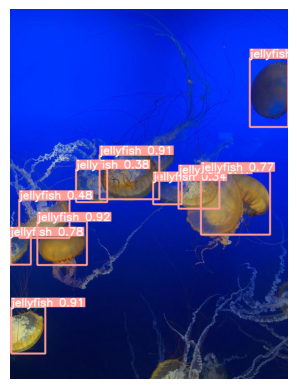

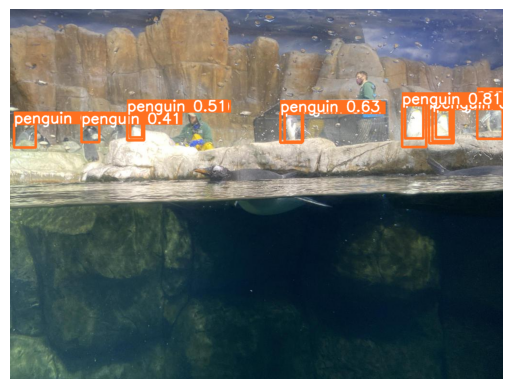

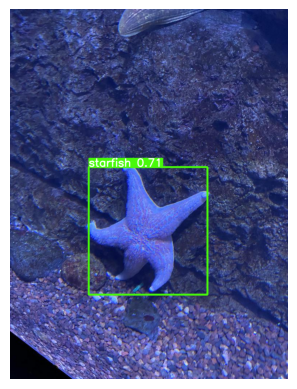

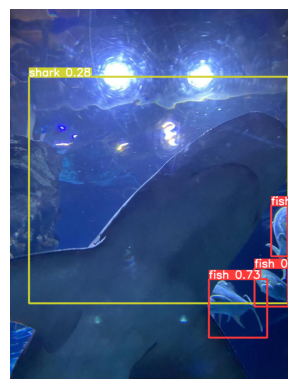

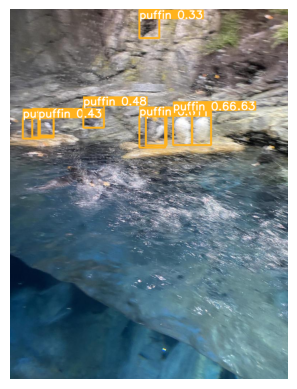

In [10]:
detection_pipeline(test_imgs)

# **Do tell me if there is any improvement. Thank you in Advance**

 **Thank you 'S M JISHANUL ISLAM' for the Detect Pipeline function**